In [1]:
#Import Packages
import numpy as np
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import heapq
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import netrd as net
from itertools import combinations as cm
import random


In [2]:
#Cancer Networks

#read in sample sheet
ss = pl.read_csv('Ovary/sample_sheet.tsv', separator = '\t')
#print(ss.head())

# Get the list of column names
column_names = ss.columns

#read in dictionary
raw_dict = pl.read_excel('Ovary/dictionary_ids.xlsx', read_options = {"header_row": 1})
print(raw_dict.head())

shape: (5, 2)
┌─────────────────┬──────────────────┐
│ Model id        ┆ TCGA id          │
│ ---             ┆ ---              │
│ str             ┆ str              │
╞═════════════════╪══════════════════╡
│ MODEL1707110006 ┆ TCGA_04_1332_01A │
│ MODEL1707110007 ┆ TCGA_04_1338_01A │
│ MODEL1707110008 ┆ TCGA_04_1341_01A │
│ MODEL1707110009 ┆ TCGA_04_1343_01A │
│ MODEL1707110010 ┆ TCGA_04_1347_01A │
└─────────────────┴──────────────────┘


In [3]:
avg_k_in = []
avg_k_out = []

#Create list of graphs (Tissue specific )
list_graphs = []
for i in range (ss.height):
    filepath = (f"Ovary/Metabolites-based/Metabolites-based_tissue/meanSum_{ss['Sample.ID'][i]}.graphml")
    #print(filepath)

    in_deg = []
    out_deg = []

    g = nx.read_graphml(filepath)
    
    for n, d in g.in_degree():
        in_deg.append(d)
    for n, d in g.out_degree():
        out_deg.append(d)
    
    avg_k_in.append(np.mean(in_deg))
    avg_k_out.append(np.mean(out_deg))

    list_graphs.append(g)
    #print(len(list_graphs))

In [6]:
per_node_in = {}
per_node_out = {}

#Calculate average in and out degree for every node across all graphs
for g in list_graphs:
    for i, n in enumerate(g.nodes()):
        if n not in per_node_in or n not in per_node_out:
            per_node_in[n] = 0
            per_node_out[n] = 0
        per_node_in[n] += g.in_degree(n)
        per_node_out[n] += g.out_degree(n)
    for n in g.nodes():
        per_node_in[n] /= len(list_graphs)
        per_node_out[n] /= len(list_graphs)

test_in = []
test_out = []

#for n, d in enumerate(list_graphs[0].nodes()):
    #test_in.append(list_graphs[0].in_degree(d))
    #test_out.append(list_graphs[0].out_degree(d))

#np.save('test_in.npy', test_in)
#np.save('test_out.npy', test_out)

#Save per_node_in and per_node_out in .npy files
#np.save('per_node_in1.npy', np.array(list(per_node_in.values())))
#np.save('per_node_out1.npy', np.array(list(per_node_out.values())))

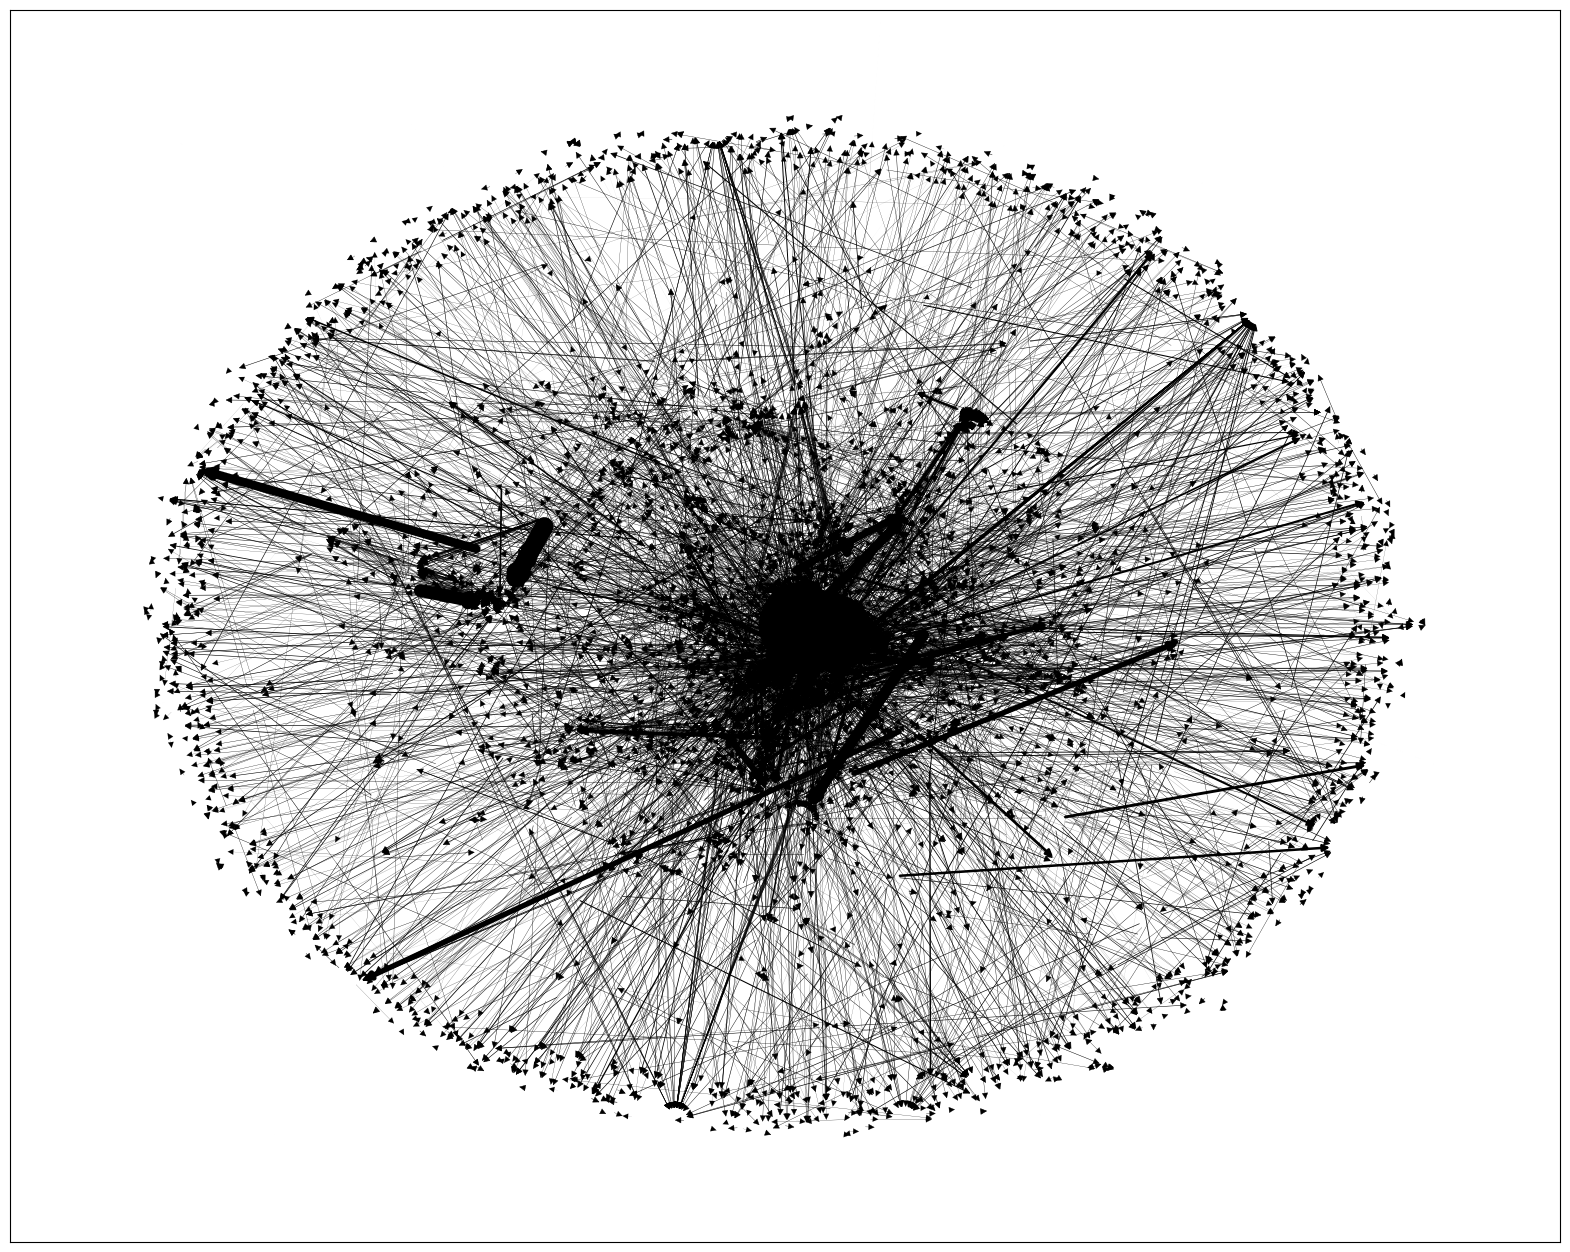

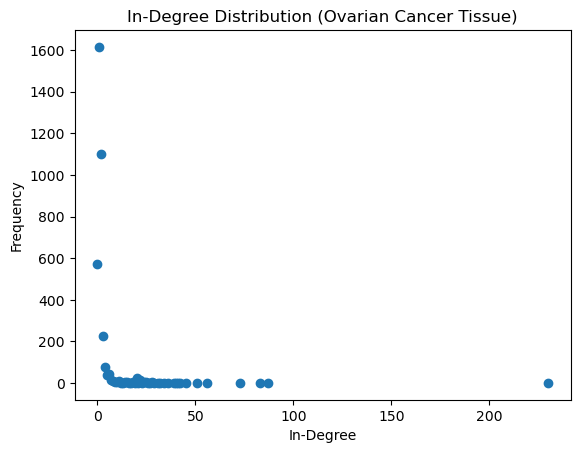

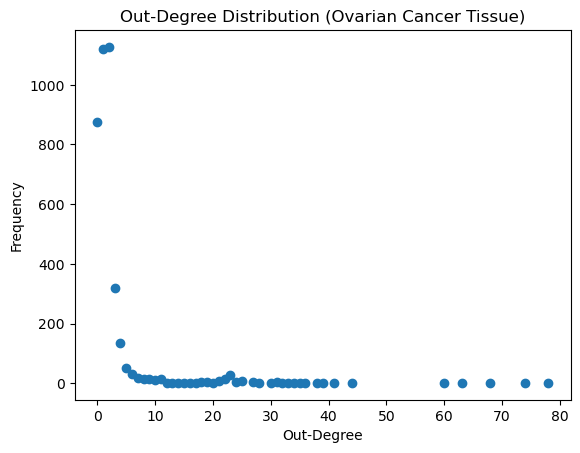

In [5]:
#Single graph test statistics
filepath = (f"Ovary/Metabolites-based/Metabolites-based_tissue/meanSum_TCGA-04-1331-01A.graphml")
G = nx.read_graphml(filepath)

pos = nx.forceatlas2_layout(G, max_iter = 100, scaling_ratio = 0.5, gravity = 0.5, dissuade_hubs=True)
#pos = nx.spring_layout(G, k=1000, iterations=50, method = 'energy', gravity = 0.5, scale = 20)

#nx.draw_networkx_nodes(G, pos, node_size=1)


weights_dict = nx.get_edge_attributes(G, 'weight')
edge_weights = [weights_dict[edge] for edge in G.edges()]

scaled_weights = [w * 0.1 for w in edge_weights]

plt.figure(figsize=(20, 16))
nx.draw_networkx_edges(G, pos, width=scaled_weights)
plt.show()

degrees = [deg for _, deg in G.in_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

degrees = [deg for _, deg in G.out_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

In [8]:
#Basic Network Stats

#Nodes and Edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

print(f"Average in-degree: {np.mean([deg for _, deg in G.in_degree()])}")
print(f"Average out-degree: {np.mean([deg for _, deg in G.out_degree()])}")

#Strongly connected
print(nx.is_strongly_connected(G))

#Density
print(f"Density: {nx.density(G)}")

#Node names
node_names = nx.get_node_attributes(G, 'name')
print(node_names)

Number of nodes: 3827
Number of edges: 8533
Average in-degree: 2.2296838254507447
Average out-degree: 2.2296838254507447
False
Density: 0.000582771517368203
{'n0': 'm01570s', 'n1': 'm02956s', 'n2': 'm00234s', 'n3': 'm00503c', 'n4': 'm03147s', 'n5': 'm02959s', 'n6': 'm00241s', 'n7': 'm00510c', 'n8': 'm02048s', 'n9': 'm02353s', 'n10': 'm01451s', 'n11': 'm01268n', 'n12': 'm01268c', 'n13': 'm00240c', 'n14': 'm00511c', 'n15': 'm00560c', 'n16': 'm00656c', 'n17': 'm01450c', 'n18': 'm01451c', 'n19': 'm01813c', 'n20': 'm02629c', 'n21': 'm02684c', 'n22': 'm02685c', 'n23': 'm02750c', 'n24': 'm02808c', 'n25': 'm02908c', 'n26': 'm02958c', 'n27': 'm02392c', 'n28': 'm02774c', 'n29': 'm01410s', 'n30': 'm01412c', 'n31': 'm01412m', 'n32': 'm02348c', 'n33': 'm02635m', 'n34': 'm02348m', 'n35': 'm02409c', 'n36': 'm02409m', 'n37': 'm03134s', 'n38': 'm02694c', 'n39': 'm02120s', 'n40': 'm02122c', 'n41': 'm02108s', 'n42': 'm02107c', 'n43': 'm02642s', 'n44': 'm02644c', 'n45': 'm02614s', 'n46': 'm02616c', 'n47':

In [9]:
#Centralities

harmonic = nx.harmonic_centrality(G)
weighted_eigen = nx.eigenvector_centrality(G, max_iter=500, weight='weight')
weighted_betweenness = nx.betweenness_centrality(G, weight='weight')
pagerank = nx.pagerank(G, weight='weight')
weighted_degree = {n: d / (len(G)-1) for n, d in G.degree(weight='weight')}

def assign_names(node_dict, name_dict) -> list: #Assign metabolite names to centrality scores and sort by score
    new_dict = {}
    for key in node_dict.keys():
        if key in name_dict:
            new_dict[name_dict[key]] = node_dict[key]
    new_list = (sorted(new_dict.items(), key=lambda item:item[1], reverse=True))
    return new_list

#Run assign names function for all centrality measures
sorted_degree = assign_names(weighted_degree, node_names)
sorted_harmonic = assign_names(harmonic, node_names)
sorted_eigen = assign_names(weighted_eigen, node_names)
sorted_between = assign_names(weighted_betweenness, node_names)
sorted_pagerank = assign_names(pagerank, node_names)

#Print results
print(f"Degree Centrality: {sorted_degree}")
print(f"Harmonic Centrality: {sorted_harmonic}")
print(f"Weighted Eigenvector Centrality: {sorted_eigen}")
print(f"Weighted Betweenness Centrality: {sorted_between}")
print(f"Weighted PageRank: {sorted_pagerank}")


Degree Centrality: [('m02519s', 0.4101986121591056), ('m02519c', 0.40893715084659477), ('m01285c', 0.22866373789845038), ('m03106g', 0.1409010714454025), ('m02348c', 0.12455891536562697), ('m02348m', 0.10946352654353256), ('m02348r', 0.10476185572399371), ('m01975c', 0.09892979564632963), ('m02896c', 0.09060933314859257), ('m01261m', 0.08953325226353405), ('m02026c', 0.08693063866791292), ('m01307c', 0.08514393463523103), ('m01986c', 0.08269019796162846), ('m01975s', 0.08103837575610487), ('m02896s', 0.07922395294298183), ('m01628c', 0.07906412867699471), ('m01307s', 0.07862483920919862), ('m01369c', 0.0761842317302666), ('m02471c', 0.07426851026435667), ('m01974c', 0.0738955560789585), ('m03107g', 0.07165101042730578), ('m01986s', 0.0710493012959575), ('m01369s', 0.07095588855201254), ('m02993c', 0.07094423597356209), ('m01628s', 0.06855537194672812), ('m02993s', 0.06699446597878948), ('m03089c', 0.06694445159435443), ('m02471s', 0.06640849162870587), ('m03089s', 0.06420336617877678),

In [9]:
#Different method for calculating average centrality measures for all nodes
#Create an average adjacency matrix, then create graph from matrix and run centrality measures

#Trying it the computer's way to preserve node names

# canonical node keys (these are the actual node IDs used in your graphs)
nodes_order = list(list_graphs[0].nodes())

# build adj_list using that order
adj_list = [nx.to_numpy_array(g, nodelist=nodes_order, weight='weight') for g in list_graphs]

avg_adj = sum(adj_list) / len(adj_list)

# create graph from average adjacency (nodes will be 0..n-1)
avg_G = nx.from_numpy_array(avg_adj, create_using=nx.DiGraph)

# relabel numeric nodes back to original keys, so avg_G has the same node keys as your original graphs
mapping = {i: nodes_order[i] for i in range(len(nodes_order))}
avg_G = nx.relabel_nodes(avg_G, mapping)


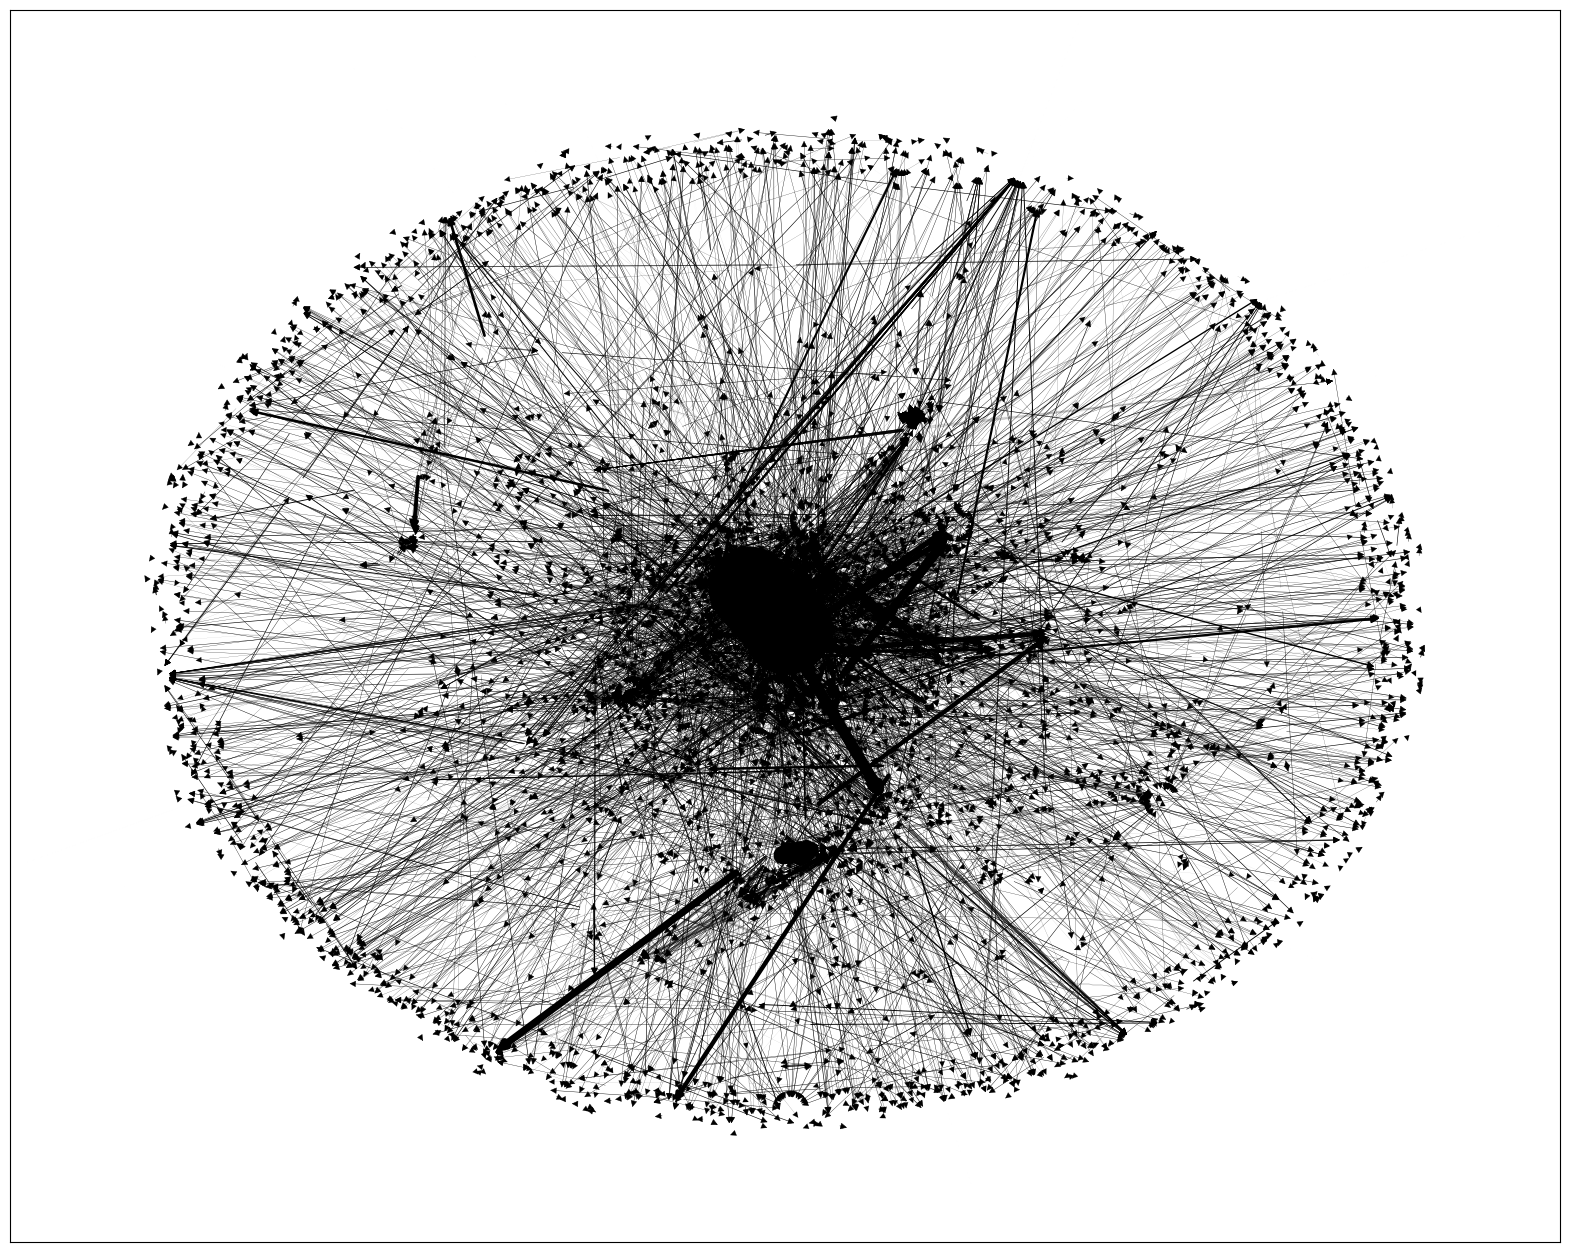

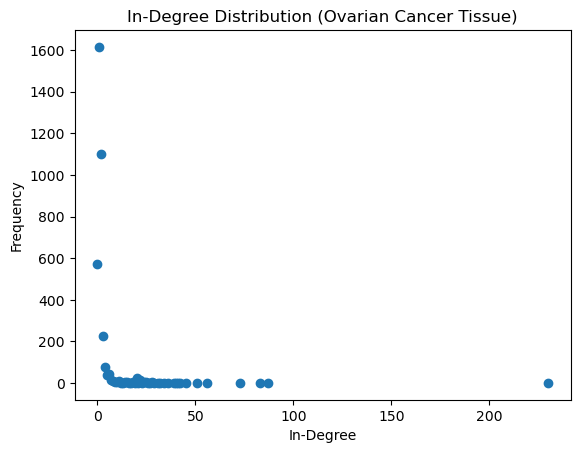

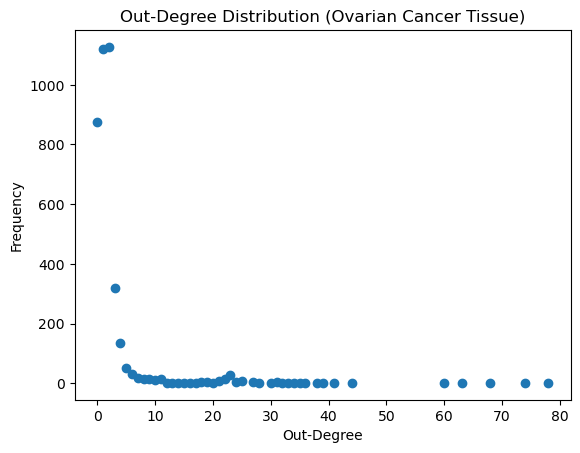

In [27]:
#Visualize Average Graph

pos = nx.forceatlas2_layout(avg_G, max_iter = 100, scaling_ratio = 0.5, gravity = 0.5, dissuade_hubs=True)
#pos = nx.spring_layout(G, k=1000, iterations=50, method = 'energy', gravity = 0.5, scale = 20)

#nx.draw_networkx_nodes(G, pos, node_size=1)


weights_dict = nx.get_edge_attributes(avg_G, 'weight')
edge_weights = [weights_dict[edge] for edge in avg_G.edges()]

scaled_weights = [w * 0.1 for w in edge_weights]

plt.figure(figsize=(20, 16))
nx.draw_networkx_edges(avg_G, pos, width=scaled_weights)

plt.savefig("Graphpic.pdf", format = "pdf", dpi = 500, bbox_inches = 'tight')
plt.show()

degrees = [deg for _, deg in avg_G.in_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

degrees = [deg for _, deg in avg_G.out_degree()] # For any graph G

vals, freq = np.unique(degrees, return_counts=True)

plt.scatter(vals, freq, marker="o")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()

Degree Centrality: [('m02519s', 0.44834768646052264), ('m02519c', 0.4479166424461721), ('m01285c', 0.20186197833005418), ('m03106g', 0.13892472723822039), ('m02348c', 0.11911152849866741), ('m01975c', 0.10585030141553599), ('m02896c', 0.09893531892902571), ('m01986c', 0.09463390158016771), ('m02348m', 0.09284849151042653), ('m01307c', 0.09225095138616059), ('m01261m', 0.08945325477697884), ('m01975s', 0.08905511525302066), ('m02896s', 0.08719778614456619), ('m01307s', 0.08652120214176398), ('m02471c', 0.08531093169874847), ('m02348r', 0.08444031264559804), ('m01628c', 0.08392247308679561), ('m01986s', 0.08233710016097426), ('m01369c', 0.08180064263860841), ('m02471s', 0.0777516798975098), ('m01369s', 0.07671074169282983), ('m02026c', 0.07621972425178776), ('m03089c', 0.07600645120264508), ('m02993c', 0.07597022920565348), ('m01628s', 0.07343238102375864), ('m03089s', 0.07338083500163466), ('m01974c', 0.07295228305725686), ('m02993s', 0.07197909349953495), ('m03107g', 0.0717405819521552

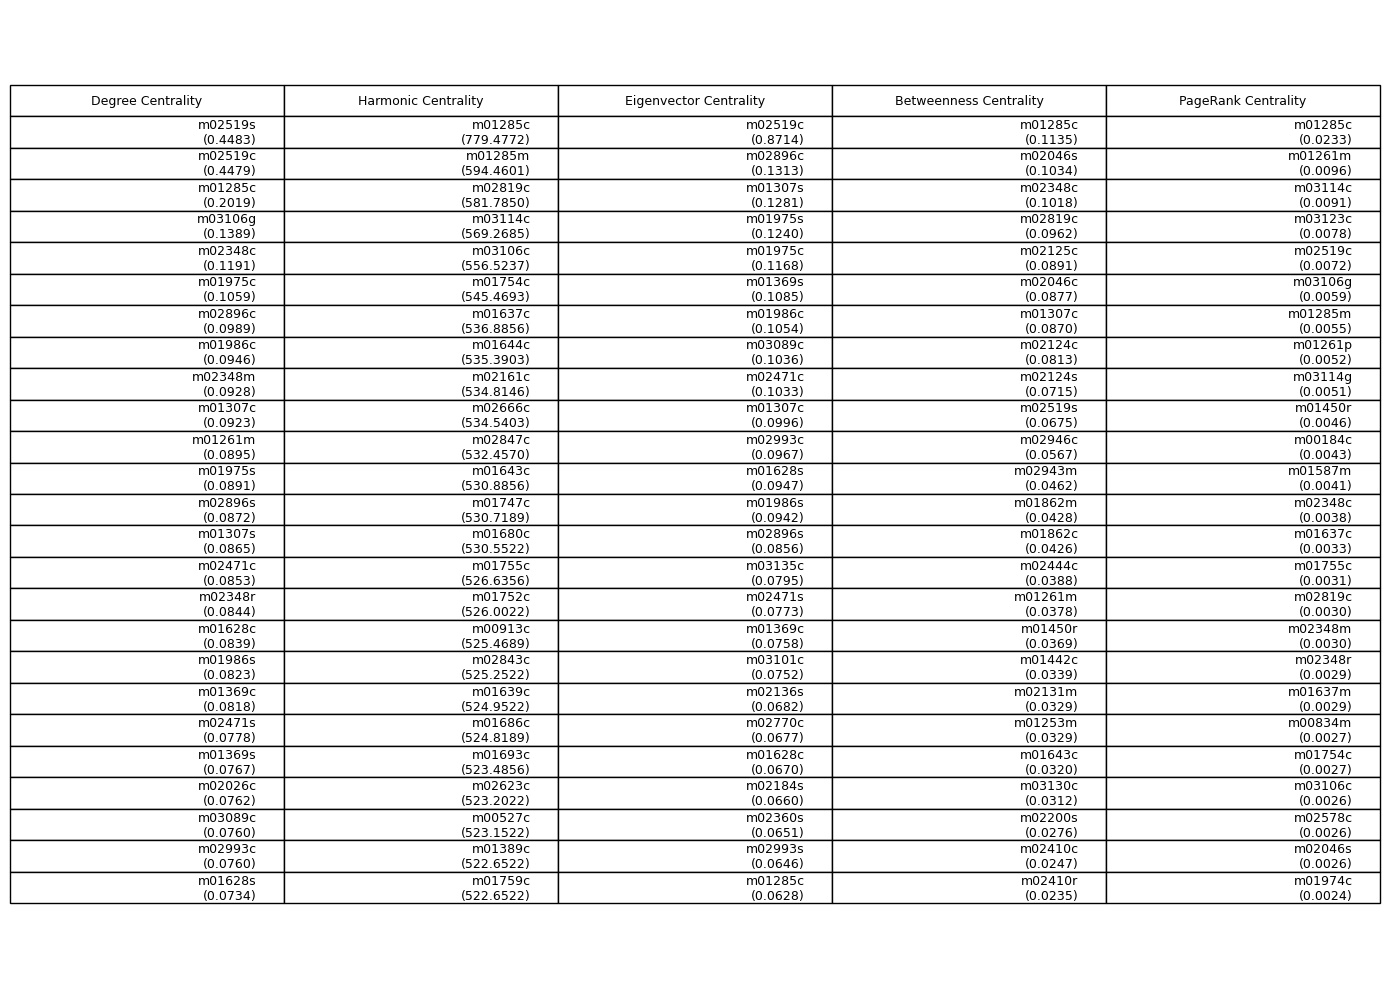

         Degree Centrality  Harmonic Centrality  Eigenvector Centrality  \
m02519s           0.448348           385.244661            4.727212e-02   
m02519c           0.447917           498.598620            8.714133e-01   
m01285c           0.201862           779.477180            6.277287e-02   
m03106g           0.138925           352.420302            2.746347e-07   
m02348c           0.119112           412.310276            3.595421e-04   

         Betweenness Centrality  PageRank Centrality  
m02519s                0.067542             0.002237  
m02519c                0.021161             0.007180  
m01285c                0.113502             0.023305  
m03106g                0.020542             0.005873  
m02348c                0.101780             0.003785  


In [11]:
#Calculate centrality data for average graph (Copied from other cells)

harmonic = nx.harmonic_centrality(avg_G)
weighted_eigen = nx.eigenvector_centrality(avg_G, max_iter=500, weight='weight')
weighted_betweenness = nx.betweenness_centrality(avg_G, weight='weight')
pagerank = nx.pagerank(avg_G, weight='weight')
weighted_degree = {n: d / (len(avg_G)-1) for n, d in avg_G.degree(weight='weight')}

def assign_names(node_dict, name_dict) -> list: #Assign metabolite names to centrality scores and sort by score
    new_dict = {}
    for key in node_dict.keys():
        if key in name_dict:
            new_dict[name_dict[key]] = node_dict[key]
    new_list = (sorted(new_dict.items(), key=lambda item:item[1], reverse=True))
    return new_list

#Run assign names function for all centrality measures
sorted_degree = assign_names(weighted_degree, node_names)
sorted_harmonic = assign_names(harmonic, node_names)
sorted_eigen = assign_names(weighted_eigen, node_names)
sorted_between = assign_names(weighted_betweenness, node_names)
sorted_pagerank = assign_names(pagerank, node_names)

#Print results
print(f"Degree Centrality: {sorted_degree}")
print(f"Harmonic Centrality: {sorted_harmonic}")
print(f"Weighted Eigenvector Centrality: {sorted_eigen}")
print(f"Weighted Betweenness Centrality: {sorted_between}")
print(f"Weighted PageRank: {sorted_pagerank}")

# Visualize Centralities as columns (top N per column) and build numeric DataFrame
top_n = 25
full_lists = [sorted_degree, sorted_harmonic, sorted_eigen, sorted_between, sorted_pagerank]
headers = ["Degree Centrality", "Harmonic Centrality", "Eigenvector Centrality", "Betweenness Centrality", "PageRank Centrality"]

# Prepare formatted columns (each column is top_n entries, padded if necessary)
formatted_columns = []
for lst in full_lists:
    col = []
    for i in range(top_n):
        if i < len(lst):
            name, val = lst[i]
            col.append(f"{name}\n({val:.4f})")
        else:
            col.append("")
    formatted_columns.append(col)

# Transpose columns to rows for table display: each row is the i-th ranked entry across measures
data = [list(row) for row in zip(*formatted_columns)]

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax.axis('tight')

# Draw table; set column widths so it fits better
col_width = 1.0 / len(headers)
cent_table = ax.table(cellText=data, colLabels=headers, loc='center', colWidths=[col_width] * len(headers))
cent_table.auto_set_font_size(False)
cent_table.set_fontsize(9)
cent_table.scale(1, 1.5)

plt.tight_layout()
plt.show()

# Build a numeric centrality DataFrame (nodes x measures). Missing values filled with 0.
centrality_df = pd.DataFrame({
    headers[i]: dict(full_lists[i])
    for i in range(len(headers))
})
centrality_df = centrality_df.fillna(0)

print(centrality_df.head())



In [12]:
#Trying my own Chung-Lu

def directed_weighted_chung_lu_model(expected_in_degrees, expected_out_degrees, weights, seed=None):
    """
    Generates a directed graph using the Chung-Lu model with given expected 
    in-degrees and out-degrees.

    Args:
        expected_in_degrees (list or array): List or array of expected in-degrees for each node.
        expected_out_degrees (list or array): List or array of expected out-degrees for each node.
        weights (list or array): List or array of weights for each edge.
        seed (int, optional): Seed for the random number generator. Defaults to None.

    Returns:
        networkx.DiGraph: A directed graph generated by the Chung-Lu model.
    """
    if len(expected_in_degrees) != len(expected_out_degrees):
        raise ValueError("Expected in-degrees and out-degrees must have the same length.")

    n = len(expected_in_degrees)
    G = nx.DiGraph()
    G.add_nodes_from(range(n))

    # Calculate total expected degree sum (L in some notations)
    sum_expected_degrees = np.sum(expected_in_degrees) # Or sum_expected_out_degrees, they should be equal

    if sum_expected_degrees == 0:
        return G # Return empty graph if no expected edges

    rng = np.random.default_rng(seed)

    # Iterate through all possible ordered pairs of nodes (i, j)
    for i in range(n):
        for j in range(n):
            # Probability of an edge from i to j
            # The original Chung-Lu formula p_ij = (w_i * w_j) / L applies to undirected graphs.
            # For directed, we use expected_out_degree[i] and expected_in_degree[j].
            p_ij = (expected_out_degrees[i] * expected_in_degrees[j]) / sum_expected_degrees

            # Ensure probability is within [0, 1]
            p_ij = min(1.0, p_ij)

            # Add edge if a random number is less than p_ij
            if rng.random() < p_ij:

                added_weight = random.choice(weights)
                #weights.remove(added_weight)
                G.add_edge(i, j, weight = added_weight)
    return G

10.179849357687967
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

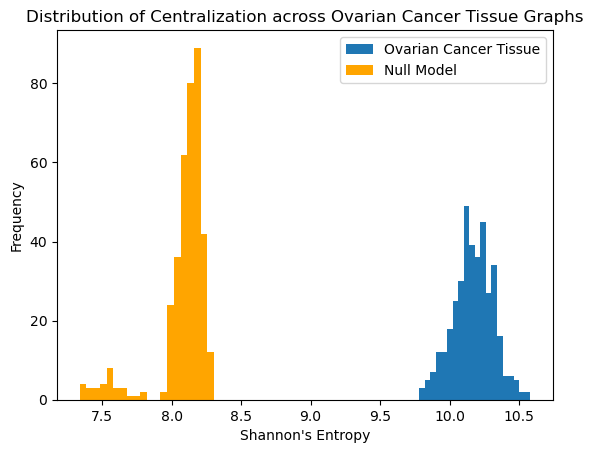

In [26]:
#Centralization

#Returns Shannon's Information Entropy for graph G
def centralization(G):
    #Generate weighted degree distribution
    degrees = np.array([d for n, d in G.degree(weight = 'weight')])
    #print(np.sum(degrees))
    degrees = degrees / sum(degrees)
    #print(degrees)

    dcount = 0
    for d in degrees:
        if d <= 0:
            dcount += 1
    #print(dcount)

    #Calculate Shannon's entropy
    degrees = degrees[degrees > 0] # Remove zero entries, log(0) no worky
    entropy = -1*np.sum(degrees * np.log2(degrees))
    
    #discretize degrees into bins
    #hist, bin_edges = np.histogram(degrees, bins=100, density=True)

    #Calculate Shannon's entropy
    #hist = hist[hist > 0] # Remove zero entries, log(0) no worky
    #entropy = -1*np.sum(hist * np.log2(hist))

    return entropy

print(centralization(avg_G))

#Calculate centralization for all graphs
centralizations = []
null_centralizations = []
count = 0
for g in list_graphs:
    cent = centralization(g)
    centralizations.append(cent)

    null_weights = list(nx.get_edge_attributes(g, 'weight').values())
    null_cent = centralization(directed_weighted_chung_lu_model(avg_k_out, avg_k_in, null_weights))
    null_centralizations.append(null_cent)
    
    count+=1
    print(count)



#Plot centralization distribution
plt.hist(centralizations, bins=20, label = 'Ovarian Cancer Tissue')
plt.xlabel("Shannon's Entropy")
plt.ylabel("Frequency")
plt.title("Distribution of Centralization across Ovarian Cancer Tissue Graphs")

#Plot null centralization distribution
plt.hist(null_centralizations, bins=20, color = 'orange', label = 'Null Model')

plt.legend()

plt.savefig("Centralizations.pdf", format = "pdf", dpi = 500, bbox_inches = 'tight')
plt.show()



In [21]:
#Hammingish Distance
#Calculate average difference between corresponding edges of random graph pairs

#Compare two arrays only when one of their corresponding elements is non-zero
#Also doing null comparisons at same time
def custom_compare (A1, A2): 
    ham_list = []

    for i in range(A1.shape[0]):
        for j in range(A1.shape[1]):
            if A1[i][j] != 0 or A2[i][j] != 0:
                ham_list.append(abs(A1[i][j] - A2[i][j]))

    return np.sum(ham_list) / len(ham_list)

count = 0

hams = []
null_hams = []
for A1, A2 in cm(adj_list, 2):

    nullA1 = directed_weighted_chung_lu_model(avg_k_in, avg_k_out, list(A1[A1 != 0]))
    nullA2 = directed_weighted_chung_lu_model(avg_k_in, avg_k_out, list(A2[A2 != 0]))

    nullA1_mat = nx.to_numpy_array(nullA1, weight='weight')
    nullA2_mat = nx.to_numpy_array(nullA2, weight='weight')

    ham = custom_compare(A1, A2)
    hams.append(ham)

    null_ham = custom_compare(nullA1_mat, nullA2_mat)
    null_hams.append(null_ham)

    print(count)
    count += 1
    if count >= 1000:
        break

print(f"Hamming distances calculated: {len(hams)}")
print(f"Mean hamming distance: {np.mean(hams):.4f}")
print(f"Min hamming distance: {np.min(hams):.4f}")
print(f"Max hamming distance: {np.max(hams):.4f}")

print(f"Null hamming distances calculated: {len(null_hams)}")
print(f"Mean null hamming distance: {np.mean(null_hams):.4f}")
print(f"Min null hamming distance: {np.min(null_hams):.4f}")
print(f"Max null hamming distance: {np.max(null_hams):.4f}")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

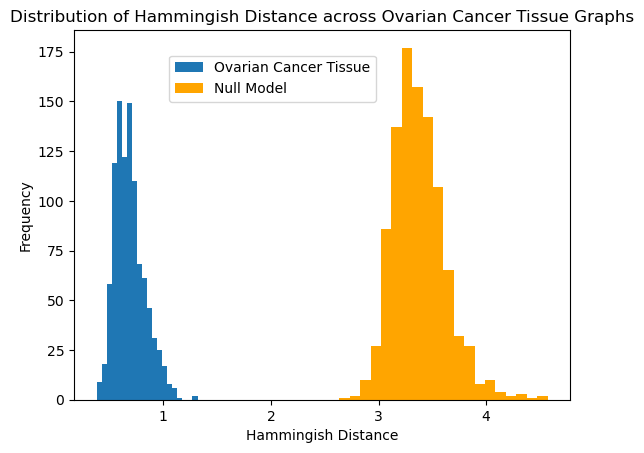

In [23]:
#Visualize Hamming Distance Distribution

plt.hist(hams, bins = 20, label = 'Ovarian Cancer Tissue')
plt.hist(null_hams, bins = 20, color = 'orange', label = 'Null Model')

plt.xlabel("Hammingish Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Hammingish Distance across Ovarian Cancer Tissue Graphs")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.4, 0.95))

plt.savefig("Hammingish.pdf", format = "pdf", dpi = 500, bbox_inches = 'tight')
plt.show()

Text(0.5, 1.0, 'Out-Degree Distribution (Ovarian Cancer Tissue)')

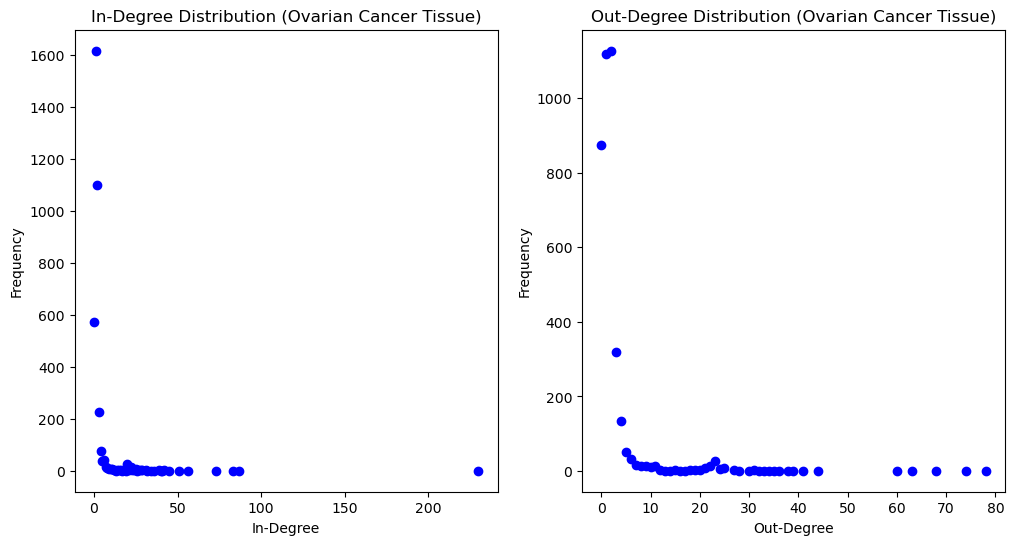

In [79]:
#Put both degree distributions on one subplot for average graph
#degrees = [deg for _, deg in avg_G.in_degree()] # For avg_G

#vals, freq = np.unique(degrees, return_counts=True)

'''
plt.scatter(vals, freq, marker="o")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.title("In-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()
'''
#degrees = [deg for _, deg in G.out_degree()] # For any graph G

#vals, freq = np.unique(degrees, return_counts=True)
'''
plt.scatter(vals, freq, marker="o")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.title("Out-Degree Distribution (Ovarian Cancer Tissue)")
plt.show()
'''

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#In-Degree Plot
degrees_in = [deg for _, deg in avg_G.in_degree()]
vals_in, freq_in = np.unique(degrees_in, return_counts=True)
ax[0].scatter(vals_in, freq_in, marker = "o", color = 'blue')
ax[0].set_xlabel("In-Degree")
ax[0].set_ylabel("Frequency")
ax[0].set_title("In-Degree Distribution (Ovarian Cancer Tissue)")

#Out-Degree Plot
degrees_out = [deg for _, deg in avg_G.out_degree()]
vals_out, freq_out = np.unique(degrees_out, return_counts=True)
ax[1].scatter(vals_out, freq_out, marker = "o", color = 'blue')
ax[1].set_xlabel("Out-Degree")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Out-Degree Distribution (Ovarian Cancer Tissue)")


In [16]:
#Random Node Removal (Robustness Analysis) of Average Graph
ls_grps = [] #create empty list to store largest connected components

n = avg_G.number_of_nodes() #get number of nodes in graph

# TODO: How many iterations do we need?
for f in np.linspace(0, 0.99, 21): #create a list of 21 numbers from 0 to 0.99, this will be the fraction of nodes to remove

    temp_G = avg_G.copy()
    # TODO: Find the node list
    node_list = list(temp_G.nodes) #create list of nodes

    # TODO: Randomly select nodes to remove
    nodes_to_remove = np.random.choice(node_list, replace = False, size = int(f * n)) #create list of random nodes, the size of fraction of nodes to remove * total nodes

    # TODO: Remove the nodes from our graph
    temp_G.remove_nodes_from(nodes_to_remove) #Subtract nodes in the list from the graph


    # TODO: Find and append the largest connected component to our list
    SCC = [len(CC) for CC in nx.weakly_connected_components(temp_G)] # Create list of sizes of all connected components
    ls_grps.append(max(SCC)) #append the size of the largest connected component to the list

#Random Node Removal of Null Model Graph

avg_edge_weights = list(nx.get_edge_attributes(avg_G, 'weight').values())
print(len(avg_edge_weights))
avg_in_degrees = [d for n, d in avg_G.in_degree()]
avg_out_degrees = [d for n, d in avg_G.out_degree()]

# TODO: Define `ls_chung'
ls_chung = []

chung_count = 0

# TODO: How many iterations do we need?
for f_chung in np.linspace(0, 0.99, 21): #create a list of 21 numbers from 0 to 0.99, this will be the fraction of nodes to remove

    chung_count += 1
    null_weights = avg_edge_weights.copy()

    # TODO: Create a GNP network
    G_chung = directed_weighted_chung_lu_model(avg_in_degrees, avg_out_degrees, null_weights) #create a new Chung-Lu graph for each iteration
    #print("Made graph")

    # TODO: Find the edge list
    edge_list = list(G_chung.edges) #create list of edges from Chung graph
    #print("Made edge list")

    # TODO: Randomly select edges to remove
    edges_to_remove = np.random.choice(len(edge_list), replace = False, size = int(f_chung * G_chung.number_of_edges())) #create list of random edges, the size of fraction of edges to remove * total edges
    #print("Made edges to remove")

    # TODO: Remove the edges from our graph
    G_chung.remove_edges_from(np.array(G_chung.edges)[edges_to_remove]) #Subtract edges in the list from the graph
    #print("removed edges")

    # TODO: Find and append the largest connected component to our list
    SCC = [len(CC) for CC in nx.weakly_connected_components(G_chung)] # Create list of sizes of all connected components
    ls_chung.append(max(SCC)) #append the size of the largest connected component to the list
    #print("Appended largest connected component")

8533


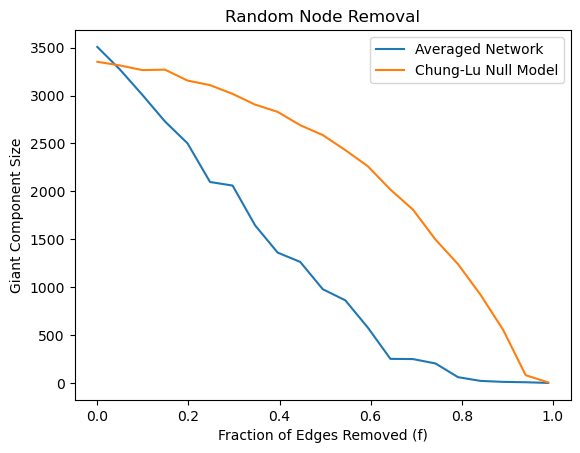

In [25]:
# TODO: Add the lists we should plot
plt.plot(np.linspace(0, 0.99, 21), ls_grps, label='Averaged Network') #plot the fraction of nodes removed vs the size of the largest connected component for Average Graph
plt.plot(np.linspace(0, 0.99, 21), ls_chung, label='Chung-Lu Null Model') #plot the fraction of nodes removed vs the size of the largest connected component for Chung-Lu Graph


plt.xlabel('Fraction of Edges Removed (f)')
plt.ylabel('Giant Component Size')
plt.title('Random Node Removal')
plt.legend()

plt.savefig("Robustness.pdf", format = "pdf", dpi = 500, bbox_inches = 'tight')
plt.show()